In [8]:
import numpy as np
class Perceptron(object):
    def __init__(self, lr=0.01, n_iter=10):
        self.lr = lr
        self.n_iter = n_iter

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0.0
        for _ in range(self.n_iter):
            for xi, yi in zip(X, y):
                delta = self.lr * (yi - self.predict(xi))
                self.weights += delta * xi
                self.bias += delta


    def predict(self, X):
        return np.where(np.dot(X, self.weights) + self.bias >= 0.0, 1, -1)

In [9]:
from sklearn.datasets._samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=2, cluster_std=2.2, random_state=42)


In [10]:
y = 2 * y -1

Text(0, 0.5, 'x2')

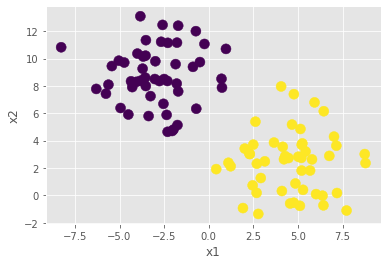

In [11]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.scatter(X[:, 0], X[:, 1], s=100, c=y)
plt.xlabel('x1')
plt.ylabel('x2')

In [12]:
p = Perceptron(lr=0.1, n_iter=10)

In [14]:
p.fit(X,y)

In [15]:
p.weights

array([ 2.20091094, -0.4798926 ])

In [16]:
p.bias

0.2

### パーセプトロン分類機を評価する

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(p.predict(X), y)

1.0

In [18]:
def plot_decision_boundary(classifier, X_test, y_test):
    h = 0.02
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() +1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    X_hypo = np.c_[xx.ravel().astype(np.float32), yy.ravel().astype(np.float32)]
    zz = classifier.predict(X_hypo)
    zz = zz.reshape(xx.shape)

    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=200)


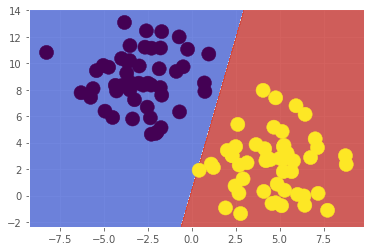

In [19]:
plot_decision_boundary(p, X, y)

### 9.3.4 線形分離できないデータにパーセプトロン

In [20]:
X, y = make_blobs(n_samples=100, centers=2, cluster_std=5.2, random_state=42)

Text(0, 0.5, 'x2')

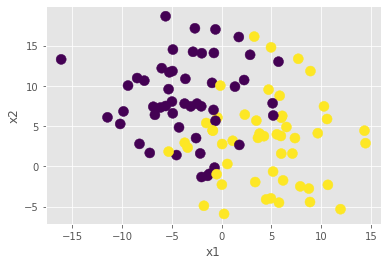

In [21]:
plt.scatter(X[:, 0], X[:, 1], s=100, c=y)
plt.xlabel('x1')
plt.ylabel('x2')

In [27]:
p = Perceptron(lr=0.1, n_iter=10)
p.fit(X, y)

In [28]:
accuracy_score(p.predict(X), y)

0.5

Text(0, 0.5, 'x2')

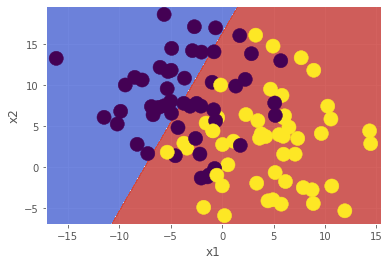

In [29]:
plot_decision_boundary(p, X, y)
plt.xlabel('x1')
plt.ylabel('x2')

### 9.4

In [30]:
# p2900
X_raw, y_raw = make_blobs(n_samples=100, centers=2, cluster_std=5.2, random_state=42)

In [31]:
X = X_raw.astype(np.float32)

In [32]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False, dtype=np.float32)
y = enc.fit_transform(y_raw.reshape(-1, 1))

/Users/kunia/opt/anaconda3/envs/detection/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [36]:
import cv2
# mlp = cv2.ml.ANN_MLP_create()

<module 'cv2' (namespace)>